<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/digital_screeni/96_101_denoise_and_PSNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

still traditional denoise filter, if you can avoid ML denoise

https://www.youtube.com/watch?v=aJrG8IH81SY&list=PLZsOBAyNTZwZrTsptDOKRdSsVO5mU5Qf0&index=6

PSNR

https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/


PSNR digest

https://myuva-my.sharepoint.com/:w:/r/personal/pfa2xb_virginia_edu/Documents/Denoise%20and%20PSNR.docx?d=w5183c1e3f340482192e3266115f6a3d8&csf=1&web=1&e=1NkGLQ


In [1]:
from skimage import data,img_as_float
import numpy as np

# MSE mean squared error

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [2]:
def AddNoise(Img, sigma):
    """
    Add Gaussian nosie to an image
    Return:
        nosiy image
    """

    Img = img_as_float(Img)
    GuassNoise = np.random.normal(0, sigma, Img.shape)
    noisyImg = Img + GuassNoise # float type noisy image

    return noisyImg

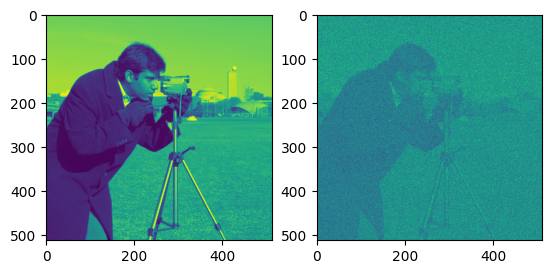

In [3]:
from matplotlib import pyplot as plt
camera = data.camera()
original = camera
noisy = AddNoise(camera,0.5)

plt.subplot(121)
plt.imshow(original)
plt.subplot(122)
plt.imshow(noisy)

In [ ]:
a1 = PSNR(original,original)
a2 = PSNR(original,noisy)

print(f"PSNR value is {a1} dB")
print(f"PSNR value is {a2} dB")

PSNR value is 100 dB
PSNR value is 4.724875971498456 dB


BM3D

two lines of code


In [ ]:
pip install bm3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00


In [ ]:
import bm3d

In [ ]:
bm3d_denoised = bm3d.bm3d(noisy,sigma_psd=0.2,stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

In [5]:
a1 = PSNR(original,noisy)
a2 = PSNR(bm3d_denoised,noisy)
print(f"PSNR value is {a1} dB")
print(f"PSNR value is {a2} dB")

plt.subplot(131)
plt.imshow(original)
plt.subplot(132)
plt.imshow(noisy)
plt.subplot(133)
plt.imshow(bm3d_denoised)

NameError: name 'bm3d_denoised' is not defined

PSNR value is 54.15840399509616 dB


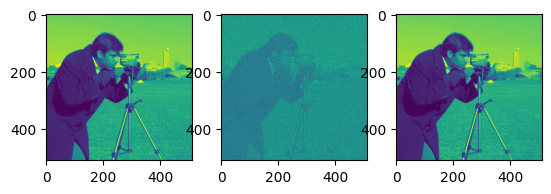

In [10]:
from skimage import filters, restoration
gaussian = filters.gaussian(original,sigma=0.5)

a3 = PSNR(gaussian,noisy)
print(f"PSNR value is {a3} dB")

plt.subplot(131)
plt.imshow(original)
plt.subplot(132)
plt.imshow(noisy)
plt.subplot(133)
plt.imshow(gaussian)

PSNR value is 4.744829889269445 dB


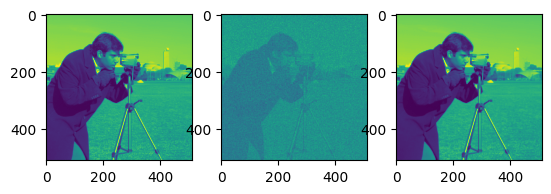

In [6]:
median = filters.median(original)

a3 = PSNR(median,noisy)
print(f"PSNR value is {a3} dB")

plt.subplot(131)
plt.imshow(original)
plt.subplot(132)
plt.imshow(noisy)
plt.subplot(133)
plt.imshow(median)

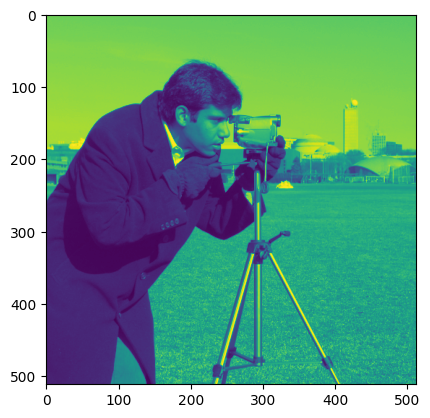

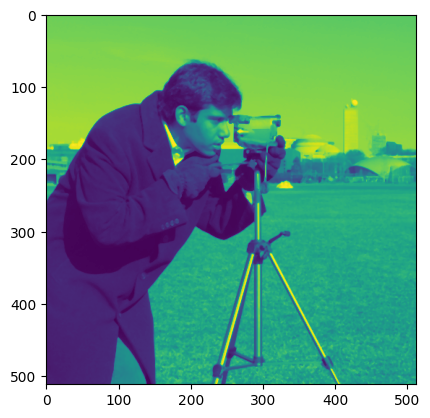

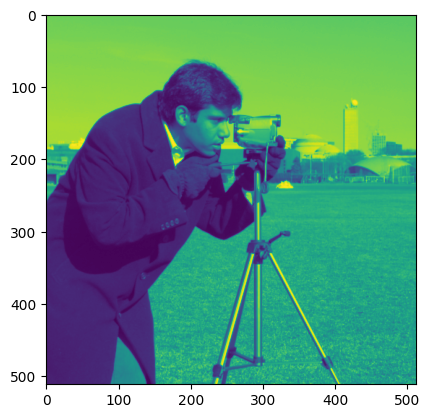

In [8]:
plt.imshow(original)
plt.show()
plt.imshow(median)
plt.show()
plt.imshow(gaussian)
plt.show()

# sleeve buttons

https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_bilateral

PSNR value is 54.10287613665915 dB


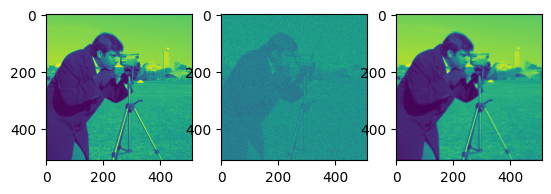

In [11]:
bilateral = restoration.denoise_bilateral(original)

a4 = PSNR(bilateral,noisy)
print(f"PSNR value is {a4} dB")

plt.subplot(131)
plt.imshow(original)
plt.subplot(132)
plt.imshow(noisy)
plt.subplot(133)
plt.imshow(bilateral)

